# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### ***answer***

> ##### DATASET SELECTION

- I selected the Healthcare topic #2: Predicting Kidney Disease Progression
- The datasets mainly came from patient research data



> #### FOR WHAT WHO HOW

##### ABOUT
The datasets consist of laboratory measurements from patients with the purpose of detecting kidney disease. Kidney disease is a broad umbrella term for multiple diseases, which can be anything related to the kidney, or the impact from and to the kidney. The common lab measurements for this disease include glucose level, creatine level, hemoglobin, blood pressures, etc.


##### WHO
While the direct audience of these datasets is usually nephrologists (doctors specialized in kidney), doctors usually may want to analyze each individual lab tests themselves and may also prefer details and understanding the science (etiology & pathology) of the disease. Instead, the target audience of these large datasets can be developers of medical device for detecting diseases based on blood test (i.e., similar to Theranos).

##### WHAT
If the audience is a medtech company specialized in kidney disease, one objective is for them to know which among these many tests are useful or predictive in detecting certain type of kidney disease and whether any of the tests would be useful to keep (e.g., not detecting anything at one time point, but can detect the chance of progression). The company may gain info on which tests to skip in order to reduce cost as well.


##### HOW
To show these, showing an interactive chart can be helpful to show which tests may not be impactful to their product. 

# 3. Homework - work with your own data

In [60]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta
# import matplotlib.pyplot as pyplot
# import seaborn as sns
# from scipy import stats




In [61]:
""" 
todo 
- simple info/describe
- duplicates: row or value
- descriptive stats
- missingness
- other irregularities
- do one example of one-hot encoding

then:
- review the data
- any dataset not usable, and alternative?
"""

' \ntodo \n- simple info/describe\n- duplicates: row or value\n- descriptive stats\n- missingness\n- other irregularities\n- do one example of one-hot encoding\n\nthen:\n- review the data\n- any dataset not usable, and alternative?\n'

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

==========================================================================
### LOADING DATASETS
Datasets are uploaded in csv formats mostly.


                  ___________________


In [62]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### DATASET1 = MIMIC dataset

*some info*
- 57 columns

In [63]:
#### DATASET1 = MIMIC dataset

df1 = pd.read_csv('dataset - acute kidney injury in MIMIC.csv')
df1.sample(3)


,gender,age,race,unit,bmi,weight,t,p,r,bp,...,ph,cl,na,k,bicarbonate,scr,bun,po2,pco2,lactate
715,M,47,white,CCU,22.6,80.0,38.0,77.0,23.0,77.0,...,7.53,107.0,145,3.5,25.0,1.2,18,83.0,28.0,2.0
1666,M,82,other,CCU,23.2,61.2,36.3,69.0,18.0,82.0,...,NaN,108.0,142,3.7,22.0,0.8,17,NaN,NaN,NaN
3347,M,65,other,CCU,39.5,105.0,36.7,103.0,24.0,73.0,...,7.38,98.0,131,3.8,26.0,3.9,32,155.0,39.0,1.3


                  ___________________
#### DATASET2 = chronic kidney

*some info*
- 26 columns

In [1]:
#### DATASET2 = chronic kidney

df2 = pd.read_csv('chronic_kidney_disease_prepared.csv')
df2.sample(3)

NameError: name 'pd' is not defined

                  ___________________
#### DATASET3 = diabetic nephropathy

*some info*
- 22 columns

In [65]:
#### DATASET3 
import openpyxl
# df3 = pd.read_csv('Diabetic_Nephropathy_v1.xlsx')
df3 = pd.read_excel('Diabetic_Nephropathy_v1.xlsx')

df3.sample(3)

,Sex,Age,Diabetes duration (y),Diabetic retinopathy (DR),Diabetic nephropathy (DN),Smoking,Drinking,Height(cm),Weight(kg),BMI (kg/m2),...,HbA1c (%),FBG (mmol/L),TG（mmoll）,C-peptide (ng/ml）,TC（mmoll）,HDLC（mmoll）,LDLC（mmoll）,Insulin,Metformin,Lipid lowering drugs
225,Male,69,10.0,0,0,1,1,170.0,88.0,30.449827,...,11.6,9.87,1.80,3.30,4.80,1.06,3.07,1,1,0
136,Female,68,8.0,0,0,0,0,168.0,58.0,20.549887,...,7.0,7.71,0.70,0.74,4.90,2.18,2.46,1,0,1
60,Female,46,3.0,1,0,0,1,153.0,56.0,23.922423,...,9.8,13.23,0.93,1.79,1.83,0.92,0.57,1,0,0


                ---             
---
### ANALYSES

##### ====== TEMPLATE =======
Create a macro to do repetitive tasks

In [66]:
def quickEDA(df, title):
    print("=" * 50)
    print(f" - - - {title.upper()} - - - -")
    print("=" * 50)

    
    # 1. overview
    ## shape
    print(f"shape: {df.shape[0]} rows x {df.shape[1]} columns")
    print("_" * 20)
    print(f"\n")

    print(f"duplicated rows: {df.duplicated().sum()} = {df.duplicated().sum()/len(df) * 100:.1f}%")
    print("_" * 20)
    print(f"\n")


    ## quick look in table view 
    infoondf = pd.DataFrame(
        {'col' : df.columns
        , 'data_types' : df.dtypes
        , 'Non null count' : df.count()
        , 'null' : df.isnull().sum()
        , 'unique values' : df.nunique()
    })

    print(infoondf.to_string(index=False))
    print("_" * 20)
    print(f"\n")



    # ----------
    # 2. review numerical

    numberscol = df.select_dtypes(include=[np.number]).columns.tolist()
    if numberscol:
        print(f"\nNUMERICAL COL: {len(numberscol)} columns")
        print("   -----    ")


        stat1 = df[numberscol].describe().round(2)
        print(stat1)

    
   


In [67]:
def quick_encode(df, columntoencode, sample=200):
    print("=" * 50)
    print(f" - - - One-hot encoding - - - -")
    print("=" * 50)

    dfsample = df.sample(n=sample).reset_index(drop=True)
    encodeddf = pd.get_dummies(dfsample, columns=[columntoencode])

    newcol = list(set(encodeddf.columns)-set(df.columns))

    other_columns = np.random.choice(
        [i for i in dfsample.columns if (i != columntoencode and i != newcol)]
        , size = 3
        , replace = False
    )

    listcoltoshow = [str(col) for col in other_columns] + [str(i) for i in newcol]

    
    # print(listcoltoshow)
    print(f"Resulted encoded columns: from [{columntoencode}] to {newcol}")
    print(encodeddf[listcoltoshow].head())


#### DATASET 1

##### EDA

In [68]:
quickEDA(df1, 'EDA dataset MIMIC study')

 - - - EDA DATASET MIMIC STUDY - - - -
shape: 4001 rows x 57 columns
____________________


duplicated rows: 0 = 0.0%
____________________


          col data_types  Non null count  null  unique values
       gender     object            4001     0              2
          age      int64            4001     0             72
         race     object            4001     0              3
         unit     object            4001     0              5
          bmi    float64            3090   911            402
       weight    float64            3809   192            938
            t    float64            3903    98             64
            p    float64            3998     3            104
            r    float64            3994     7             32
           bp    float64            3998     3             76
vent_firstday      int64            4001     0              2
vaso_firstday      int64            4001     0              2
          chf      int64            4001     0       

##### Encoding

In [69]:
quick_encode(df1, 'race')

 - - - One-hot encoding - - - -
Resulted encoded columns: from [race] to ['race_black', 'race_other', 'race_white']
   ckd  chf    ne  race_black  race_other  race_white
0    0    0  81.4       False       False        True
1    0    0  76.3       False       False        True
2    0    0  82.2       False       False        True
3    0    0  91.4       False       False        True
4    0    1  76.4       False       False        True


#### DATASET 2

##### EDA

In [70]:
quickEDA(df2, 'EDA on chronic kidney')

 - - - EDA ON CHRONIC KIDNEY - - - -
shape: 400 rows x 26 columns
____________________


duplicated rows: 0 = 0.0%
____________________


                    col data_types  Non null count  null  unique values
             Patient_id      int64             400     0            400
                    Age    float64             391     9             76
         Blood Pressure    float64             388    12             10
       Specific Gravity    float64             353    47              5
                Albumin    float64             354    46              6
                  Sugar    float64             351    49              6
        Red Blood Cells    float64             248   152              2
               Pus Cell    float64             335    65              2
        Pus Cell clumps    float64             396     4              2
               Bacteria    float64             396     4              2
   Blood Glucose Random    float64             356    44            14

In [71]:
quick_encode(df2, 'Anemia')

 - - - One-hot encoding - - - -
Resulted encoded columns: from [Anemia] to ['Anemia_1.0', 'Anemia_0.0']
   Blood Glucose Random  Sodium  Class  Anemia_1.0  Anemia_0.0
0                 182.0   163.0      1       False        True
1                  94.0   135.0      0       False        True
2                 264.0   130.0      1       False        True
3                 139.0   135.0      0       False        True
4                 107.0   141.0      0       False        True


#### DATASET 3

#### EDA

In [72]:
quickEDA(df3, 'EDA on diabetic nephropathy')

 - - - EDA ON DIABETIC NEPHROPATHY - - - -
shape: 767 rows x 22 columns
____________________


duplicated rows: 5 = 0.7%
____________________


                      col data_types  Non null count  null  unique values
                      Sex     object             767     0              2
                      Age      int64             767     0             59
    Diabetes duration (y)    float64             766     1             34
Diabetic retinopathy (DR)      int64             767     0              2
Diabetic nephropathy (DN)      int64             767     0              2
                  Smoking      int64             767     0              2
                 Drinking      int64             767     0              2
               Height(cm)    float64             766     1             43
               Weight(kg)    float64             767     0            104
              BMI (kg/m2)    float64             766     1            515
              SBP (mmHg)       int64      

In [73]:
quick_encode(df3, 'Smoking')

 - - - One-hot encoding - - - -
Resulted encoded columns: from [Smoking] to ['Smoking_1', 'Smoking_0']
   FBG (mmol/L)  Height(cm)  HDLC（mmoll）  Smoking_1  Smoking_0
0          5.98       175.0         1.45      False       True
1         10.34       156.0         0.70      False       True
2          8.13       169.0         1.34       True      False
3         11.18       173.0         1.37       True      False
4          6.60       160.0         1.63      False       True


>           ____            

### DISCUSSION

From reviewing the 3 datasets in this set, here are some conclusions:

***dataset 1***
- Dataset 1 has large numbers of columns and rows
    - Showing all of them may not be useful or fit the notebook view
    - But the large number of features can be useful for analyses using statistical methods or others, and after that it may be easier to view them like using graph

- This data does not show any duplicated rows and some of the missing values happened on some random columns such as BMI, Blood Pressure; which may come from typical incomplete real-world data, as this data came from hospital medical records. 

***dataset 2***
- The dataset has no duplicated rows and each row represents a unique patient based on patient_id (that is unique for each row). 
    - The dataset may be a cleaned version

***dataset 3***
- The dataset has some duplicated rows, but other than that, there does not seem to have any major red flags based on the descriptive statistics.


#### overall
Overall, these three datasets seem to be usable and can provide multiple analyses for data science projects. Each dataset may have different target variable but also have some common target variables, such as anemia.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [74]:
df_copyingBook= pd.DataFrame(
    {'pre' : [11,5,40,25,19],
    'post' : [12,6,14,30,38],
    'sentiment': ['Bored','Not Great','OK','Kind of interested','Excited']
    })


df_copyingBook = df_copyingBook.melt(id_vars=['sentiment'], var_name='time')



df_copyingBook

,sentiment,time,value
0,Bored,pre,11
1,Not Great,pre,5
2,OK,pre,40
3,Kind of interested,pre,25
4,Excited,pre,19
5,Bored,post,12
6,Not Great,post,6
7,OK,post,14
8,Kind of interested,post,30
9,Excited,post,38


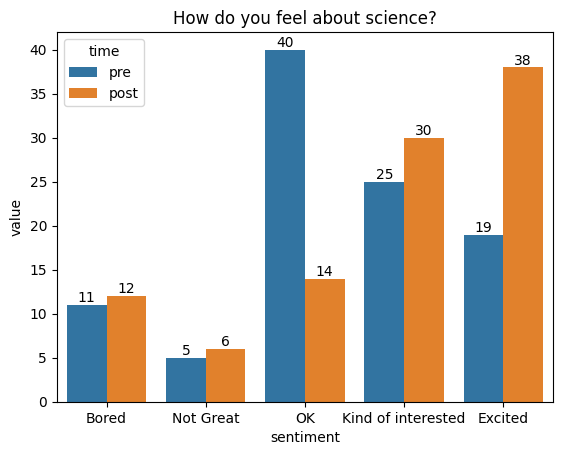

In [ ]:
# df_copyingBook.plot(kind='bar')

ax = sns.barplot(
    df_copyingBook
    , x = 'sentiment'
    , y = 'value'
    , hue = 'time'
    , palette = {
        'pre' : ''
)

for c in ax.containers:
    ax.bar_label(c)

plt.title('How do you feel about science?')

plt.show()



In [ ]:
# df_copyingBook.columns

Index(['sentiment', 'time', 'value'], dtype='object')

In [ ]:
# df_copyingBook.apply(
#     lambda row: 'gray' if row['time'] == 'post' and row['sentiment'] in ['Kind of interested', 'Excited'] 
#     else ('black' if row['time'] == 'post' else 'yellow'), axis=1)


# df_copyingBook.apply(
#     lambda row: 'gray' if row['time'] == 'post' and row['setiment'] in ['Kind of interested', 'Excited']
#     else ('blue' if row['time'] == 'post' else 'black'), axis=1
# )

0    yellow
1    yellow
2    yellow
3    yellow
4    yellow
5     black
6     black
7     black
8      gray
9      gray
dtype: object

In [ ]:
# dict(zip(df_copyingBook['time'].unique(), df_copyingBook['color']))


array(['Bored', 'Not Great', 'OK', 'Kind of interested', 'Excited'],
      dtype=object)

In [ ]:
# df_copyingBook['color'] = df_copyingBook.apply(
#     lambda row: 'gray' if row['time'] == 'post' and row['sentiment'] in ['Kind of interested', 'Excited'] 
#     else ('black' if row['time'] == 'post' else 'yellow'), axis=1)


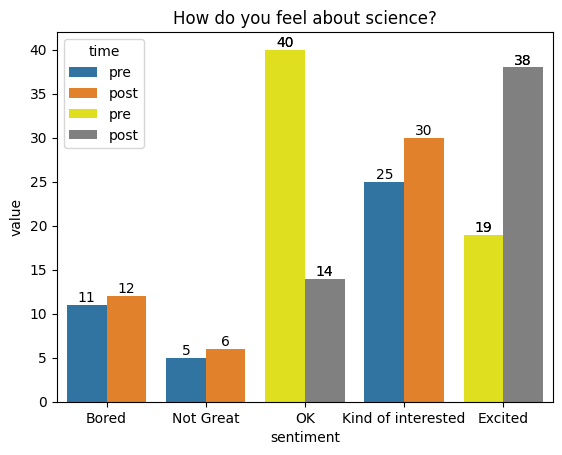

In [105]:

ax = sns.barplot(
    df_copyingBook
    , x = 'sentiment'
    , y = 'value'
    , hue = 'time'
    # , palette = dict(zip(df_copyingBook['time'].unique(), df_copyingBook['color']))
    # , palette = df_copyingBook['color']
)


sns.barplot(    
    df_copyingBook.query("sentiment in ['OK', 'Excited']")
    # df_copyingBook.query("time == 'post' and sentiment in ['OK']")
    , x = 'sentiment'
    , y = 'value'
    , hue = 'time'
    # , palette = dict(zip(df_copyingBook['time'].unique(), sns.color_palette('tab20', n_colors=len(df_copyingBook['time'].unique()))))
    , palette = {'pre' : 'yellow', 'post':'gray'}
)

for c in ax.containers:
    ax.bar_label(c)

plt.title('How do you feel about science?')

plt.show()
